In [1]:
import numpy as np
import pandas as pd
import invert4geom


import xarray as xr

#import docs.examples.sub_ice_shelf_bathymetry

from docs.examples.sub_ice_shelf_bathymetry import water_surface

ModuleNotFoundError: No module named 'docs.examples.sub_ice_shelf_bathymetry'

In [6]:
from polartoolkit import fetch, maps, profiles, regions, utils

In [3]:
import os

os.environ["POLARTOOLKIT_HEMISPHERE"] = "south"

region = regions.getz_ice_shelf

# 1.) Loading Datasets

In [ ]:
constraint_points = pd.read_csv('constraint_points.csv')

In [ ]:
bed_topography = fetch.bedmap3(layer="bed", region = region, reference="ellipsoid",spacing=2000)

bed_topography = bed_topography.rename({'x': 'easting', 'y': 'northing'}).to_dataset(name = 'upward')

In [ ]:
gravityanomaly = xr.load_dataset('gravityanomaly.nc')
gravityanomaly

In [ ]:
gravityanomaly.upward.plot()

In [15]:
import pygmt
pygmt.grdinfo(gravityanomaly.upward)

NameError: name 'gravityanomaly' is not defined

In [ ]:
utils.get_grid_region(gravityanomaly.gravity_anomaly)

# 2.) Creating data instance

In [10]:
gravityanomaly = invert4geom.create_data(gravityanomaly, buffer_width=None, model_type='prisms')
gravityanomaly

<xarray.Dataset> Size: 3MB
Dimensions:                (northing: 286, easting: 248)
Coordinates:
  * northing               (northing) float64 2kB -1.234e+06 ... -6.64e+05
  * easting                (easting) float64 2kB -1.624e+06 ... -1.13e+06
Data variables:
    gravity_disturbance    (northing, easting) float64 567kB nan nan ... nan nan
    upward                 (northing, easting) float32 284kB 456.5 ... 2.227e+03
    surface_gravity        (northing, easting) float64 567kB -1.271 ... 35.26
    water_surface_gravity  (northing, easting) float64 567kB -0.1568 ... -1.184
    gravity_anomaly        (northing, easting) float64 567kB nan nan ... nan nan
Attributes:
    region:        (-1624000.0, -1130000.0, -1234000.0, -664000.0)
    spacing:       2000.0
    buffer_width:  50000.0
    inner_region:  (-1574000.0, -1180000.0, -1184000.0, -714000.0)
    dataset_type:  data
    model_type:    prisms

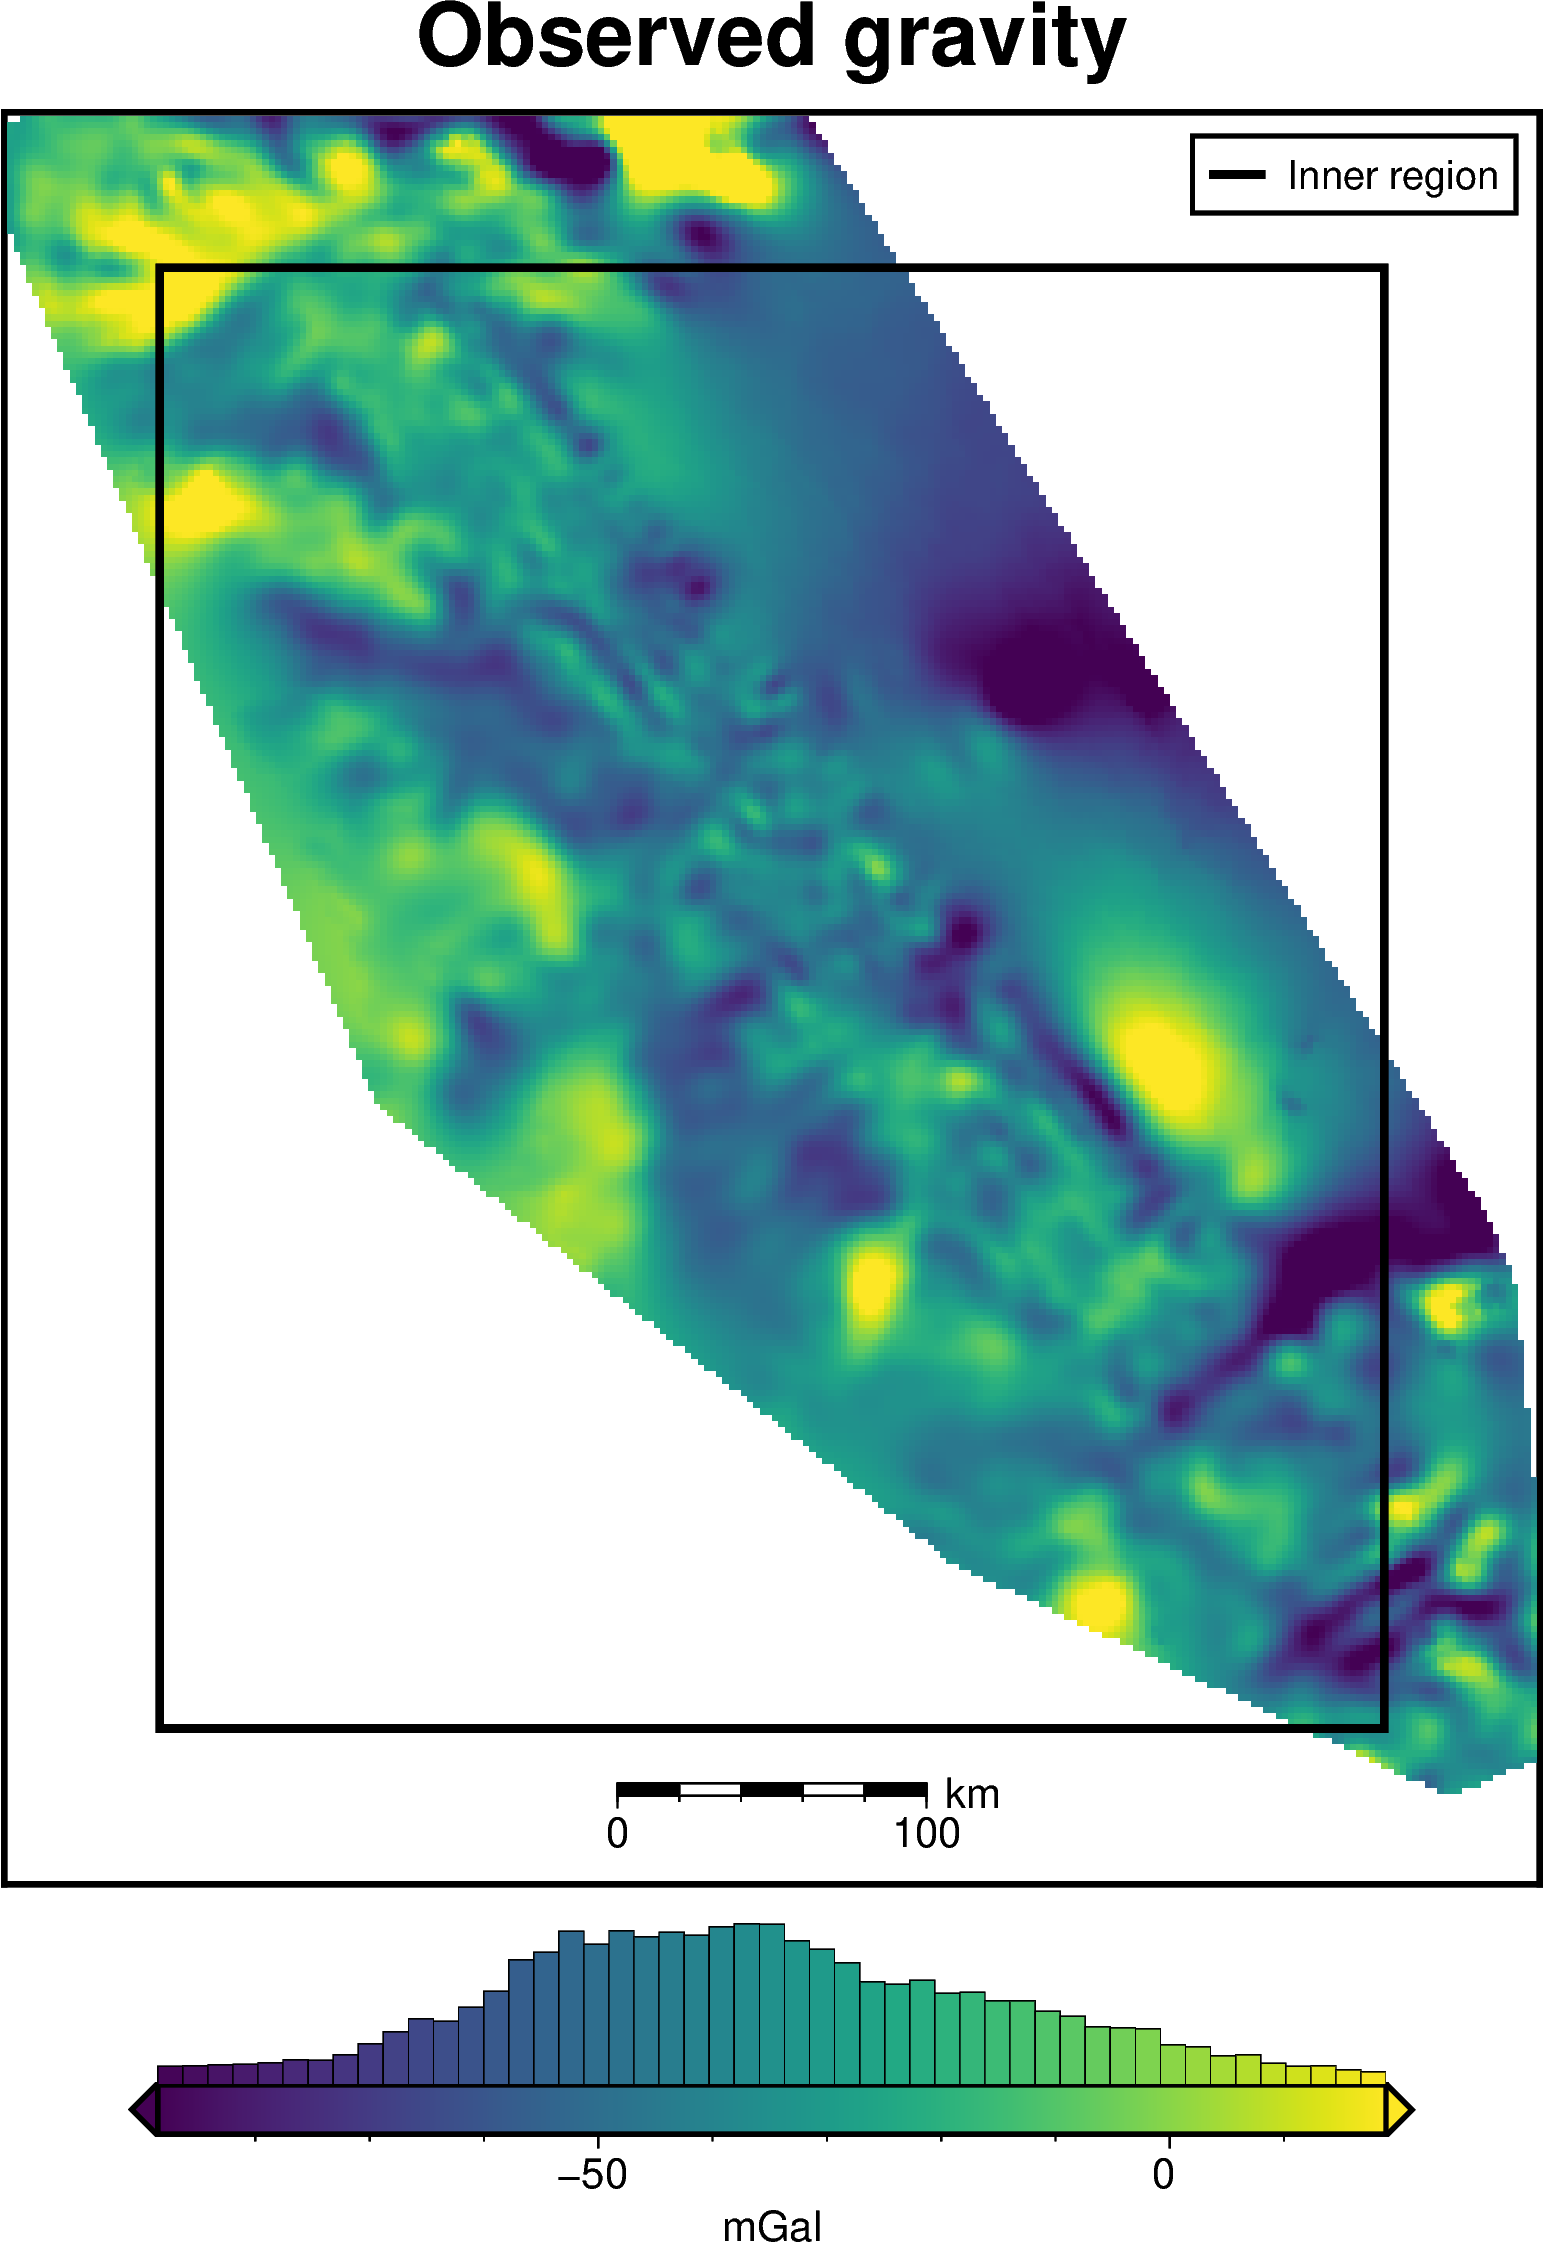

In [11]:
gravityanomaly.inv.plot_observed()

In [21]:
water_surface = fetch.bedmap3(layer = 'icebase', region = region, reference="ellipsoid",spacing = 2000)
water_surface = water_surface.rename( {'x': 'easting', 'y': 'northing'})


In [22]:
model = invert4geom.create_model(
     zref = 0,
     density_contrast= 2600 - 1030, topography = bed_topography, upper_confining_layer=water_surface

)
model

<xarray.Dataset> Size: 4MB
Dimensions:                (northing: 286, easting: 248)
Coordinates:
  * northing               (northing) float64 2kB -1.234e+06 ... -6.64e+05
  * easting                (easting) float64 2kB -1.624e+06 ... -1.13e+06
    top                    (northing, easting) float32 284kB 0.0 0.0 ... 0.0 0.0
    bottom                 (northing, easting) float64 567kB -3.485e+03 ... -...
Data variables:
    density                (northing, easting) int64 567kB -1570 -1570 ... -1570
    thickness              (northing, easting) float64 567kB 3.485e+03 ... 751.9
    starting_topography    (northing, easting) float32 284kB -3.485e+03 ... -...
    topography             (northing, easting) float32 284kB -3.485e+03 ... -...
    mask                   (northing, easting) float32 284kB 1.0 1.0 ... 1.0 1.0
    upper_confining_layer  (northing, easting) float32 284kB nan nan ... -754.6
    lower_confining_layer  (northing, easting) float64 567kB nan nan ... nan nan
Attributes:
    inner_region:      (-1624000.0, -1130000.0, -1234000.0, -664000.0)
    zref:              0
    density_contrast:  1570
    region:            (-1624000.0, -1130000.0, -1234000.0, -664000.0)
    spacing:           2000.0
    dataset_type:      model
    model_type:        prisms

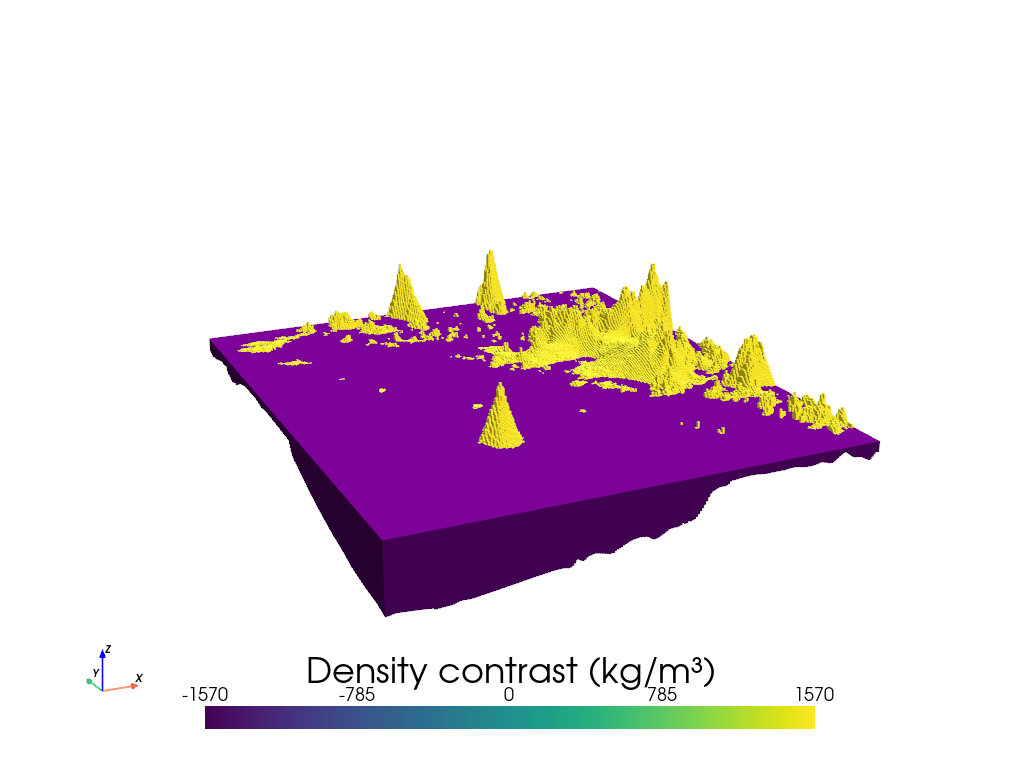

In [24]:
model.inv.plot_model(zscale = 20, color_by = 'density')